In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Read the given "diabetes.csv" into a pandas data frame

In [2]:
f_path = "/content/drive/MyDrive/DS-Lab-CS21B2018/diabetes.csv"
diab_df = pd.read_csv(f_path)
diab_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


1. Find the probability of diabetes given the dataset. Also, calculate the probability of diabetes given

a. Age above 50

b. Age between 40 and 50

c. Age between 30 and 40

d. Age less than 30


In [3]:
def prob_age(df: pd.DataFrame, above=0, below=100):
    df = df[(df.Age > above) & (df.Age < below)]
    grp = df.groupby("Outcome")
    count = len(grp.groups[1])
    prob = count/len(df)
    return prob

2. Find the probability of diabetes with,
- a glucose level of more than 120 
- blood pressure of more than 90 
- skin thickness of more than 30 
- insulin above 150 
- BMI above 25.

In [19]:
def prob_other(df: pd.DataFrame, gl=-1, bp=-1, skn=-1, ins=-1, bmi=-1):
    df = df[(df.Glucose > gl) & (df.BloodPressure > bp)
            & (df.SkinThickness > skn) & (df.Insulin > ins) & (df.BMI > bmi)]
    grp = df.groupby("Outcome")
    count = len(grp.groups[1])
    prob = count/len(df)
    return prob

Write a menu-driven program to calculate and print the above

Find Probability of Diabetes based on
1. Age above 50
2. Age between 40 and 50
3. Age between 30 and 40
4. Age less than 30
5. Visualisation and exit
Enter choice: 1
Probability of Diabetes Age above 50: 0.4691358024691358
Enter choice: 2
Probability of Diabetes Age between 40 and 50: 0.5619047619047619
Enter choice: 3
Probability of Diabetes Age between 30 and 40: 0.4861111111111111
Enter choice: 4
Probability of Diabetes Age less than 30: 0.21212121212121213
Enter choice: 5


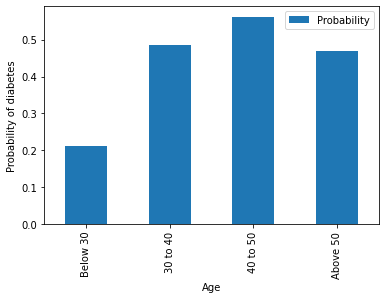

In [30]:
ch = 0
print("Find Probability of Diabetes based on")
print("1. Age above 50")
print("2. Age between 40 and 50")
print("3. Age between 30 and 40")
print("4. Age less than 30")
print("5. Visualisation and exit")
prob = [0]*4
while ch != 5:
    ch = int(input("Enter choice: "))
    age_group = [(50, 100), (40, 50), (30, 40), (0, 30)]
    if ch == 1:
        age = age_group[ch-1]
        prob[ch-1] = prob_age(diab_df, age[0], age[1])
        print("Probability of Diabetes", "Age above 50:", prob[ch-1])
    elif ch == 2:
        age = age_group[ch-1]
        prob[ch-1] = prob_age(diab_df, age[0], age[1])
        print("Probability of Diabetes", "Age between 40 and 50:", prob[ch-1])
    elif ch == 3:
        age = age_group[ch-1]
        prob[ch-1] = prob_age(diab_df, age[0], age[1])
        print("Probability of Diabetes", "Age between 30 and 40:", prob[ch-1])
    elif ch == 4:
        age = age_group[ch-1]
        prob[ch-1] = prob_age(diab_df, age[0], age[1])
        print("Probability of Diabetes", "Age less than 30:", prob[ch-1])
    elif ch == 5:
        x_axis = ["Below 30", "30 to 40", "40 to 50", "Above 50"]
        for i in range(4):
            if prob[i] == 0:
                age = age_group[i]
                prob[i] = prob_age(diab_df, age[0], age[1])
        prob.reverse()
        prob_df = pd.DataFrame({"Probability": prob}, index=x_axis)
        prob_df
        bar_graph = prob_df.plot.bar()
        bar_graph.set_xlabel("Age")
        bar_graph.set_ylabel("Probability of diabetes")
    else:
        print("Invalid input!!")


Probability of diabetes with a glucose level of more than 120 + blood pressure of
more than 90 + skin thickness of more than 30 + insulin above 150 + BMI above 25: 0.6666666666666666


Text(0.5, 0, 'Probability of diabetes')

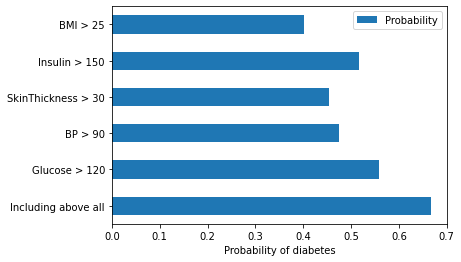

In [31]:
prob = [0]*6
prob[0] = prob_other(diab_df, gl=120, bp=90, skn=30, ins=150, bmi=25)
prob[1] = prob_other(diab_df, gl=120)
prob[2] = prob_other(diab_df, bp=90)
prob[3] = prob_other(diab_df, skn=30)
prob[4] = prob_other(diab_df, ins=150)
prob[5] = prob_other(diab_df, bmi=25)
print("""Probability of diabetes with a glucose level of more than 120 + blood pressure of
more than 90 + skin thickness of more than 30 + insulin above 150 + BMI above 25:""", prob[0])

x_axis = ["Including above all", "Glucose > 120", "BP > 90", "SkinThickness > 30", "Insulin > 150", "BMI > 25"]
prob_df = pd.DataFrame({"Probability": prob}, index=x_axis)
bar_graph = prob_df.plot.barh()
bar_graph.set_xlabel("Probability of diabetes")